In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
data = pd.read_csv('onlyAlpha.csv')
data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Fp1-LE_alpha,F3-LE_alpha,C3-LE_alpha,P3-LE_alpha,O1-LE_alpha,F7-LE_alpha,T3-LE_alpha,T5-LE_alpha,Fz-LE_alpha,Fp2-LE_alpha,...,C4-LE_alpha,P4-LE_alpha,O2-LE_alpha,F8-LE_alpha,T4-LE_alpha,T6-LE_alpha,Cz-LE_alpha,Pz-LE_alpha,A2-A1_alpha,class
0,11.19,7.75,13.34,11.89,6.69,8.49,6.46,7.86,8.31,11.32,...,4.65,6.09,8.18,10.04,2.77,4.52,8.54,9.02,7.85,0
1,14.20,9.54,13.86,16.57,11.09,12.98,6.73,11.64,11.53,14.67,...,9.20,13.80,14.05,16.58,4.62,8.93,11.43,12.49,9.74,0
2,10.63,9.36,6.75,10.46,8.80,6.55,4.70,7.26,11.13,8.55,...,5.91,7.11,7.81,6.04,2.65,4.40,10.43,9.40,8.79,0
3,31.42,20.69,49.08,52.89,17.34,16.68,14.99,25.63,23.69,28.18,...,16.37,27.07,23.36,18.37,5.11,13.56,26.13,36.55,7.69,0
4,11.02,9.65,33.14,34.99,15.42,8.30,10.13,17.58,10.45,11.47,...,10.73,19.07,25.06,8.55,2.64,11.44,16.71,26.95,6.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,28.04,29.33,26.85,18.75,16.63,21.65,24.31,16.02,32.90,28.56,...,29.19,27.08,20.64,31.56,42.09,27.00,32.34,24.29,43.66,1
1137,31.86,39.36,49.55,37.09,18.11,23.69,43.28,34.24,38.53,34.67,...,34.00,28.34,18.99,29.04,26.23,19.37,39.78,30.92,21.07,1
1138,30.12,21.56,17.70,17.86,13.41,13.71,13.71,14.87,20.09,25.51,...,18.09,15.37,14.16,14.65,10.93,11.75,19.92,16.35,4.84,1
1139,19.72,31.87,35.32,25.38,19.03,20.42,35.75,17.27,22.80,16.07,...,21.05,21.22,18.09,10.88,12.91,14.43,25.57,22.33,9.83,1


In [3]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1),
    data['class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((798, 20), (343, 20))

In [4]:
# calculate the mutual information between the variables and the target

# the smaller the value of the mi, the less information we can infer from
# the feature about the target

mi = mutual_info_classif(X_train, y_train)
mi

array([0.01413478, 0.05424171, 0.15912386, 0.1086915 , 0.04981404,
       0.09356982, 0.1016183 , 0.07588082, 0.05583998, 0.06696535,
       0.10473513, 0.13690836, 0.08251846, 0.09217095, 0.08085192,
       0.        , 0.05564402, 0.11286932, 0.10930533, 0.1100909 ])

Text(0, 0.5, 'Mutual Information')

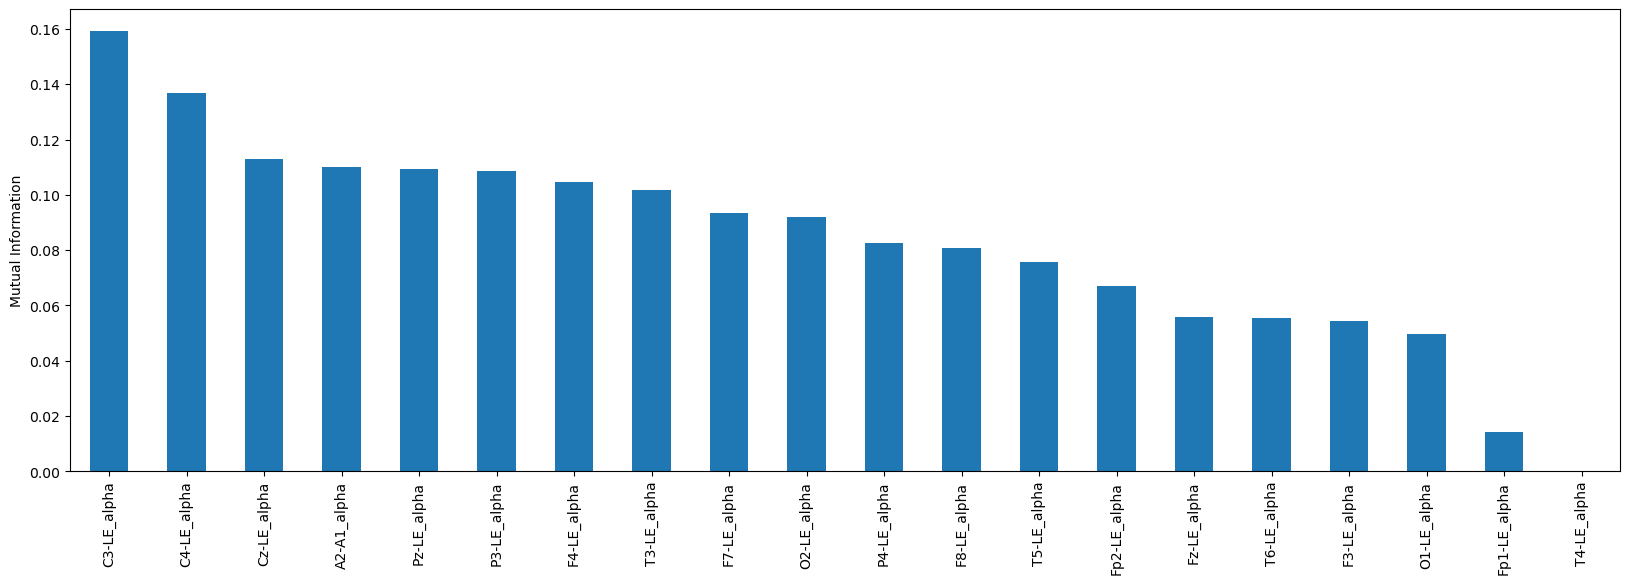

In [5]:
# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

## Select top k feature

In [7]:
# here we will select the top 10 features
# based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=5).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['C3-LE_alpha', 'P3-LE_alpha', 'C4-LE_alpha', 'Cz-LE_alpha',
       'Pz-LE_alpha'],
      dtype='object')

In [8]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [9]:
from helper import *
res=all_result(X_train,X_test,y_train,y_test)
res

,Algo Names,Accuracy,Sensitivity,Specificity,F1-Score
0,SVM,0.510204,0.023256,1.000000,0.045455
1,LogisticRegression,0.521866,0.139535,0.906433,0.226415
2,DecissionTree,0.760933,0.732558,0.789474,0.754491
3,RandomForest,0.804665,0.755814,0.853801,0.795107
4,Voting,0.539359,0.104651,0.976608,0.185567


## Chi-square

Compute chi-squared test between categorical features and classification target.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [11]:
# variables = ['pclass', 'survived', 'sex', 'sibsp', 'parch', 'embarked']

data = pd.read_csv('onlyAlpha.csv')

data.head()

,Fp1-LE_alpha,F3-LE_alpha,C3-LE_alpha,P3-LE_alpha,O1-LE_alpha,F7-LE_alpha,T3-LE_alpha,T5-LE_alpha,Fz-LE_alpha,Fp2-LE_alpha,...,C4-LE_alpha,P4-LE_alpha,O2-LE_alpha,F8-LE_alpha,T4-LE_alpha,T6-LE_alpha,Cz-LE_alpha,Pz-LE_alpha,A2-A1_alpha,class
0,11.19,7.75,13.34,11.89,6.69,8.49,6.46,7.86,8.31,11.32,...,4.65,6.09,8.18,10.04,2.77,4.52,8.54,9.02,7.85,0
1,14.20,9.54,13.86,16.57,11.09,12.98,6.73,11.64,11.53,14.67,...,9.20,13.80,14.05,16.58,4.62,8.93,11.43,12.49,9.74,0
2,10.63,9.36,6.75,10.46,8.80,6.55,4.70,7.26,11.13,8.55,...,5.91,7.11,7.81,6.04,2.65,4.40,10.43,9.40,8.79,0
3,31.42,20.69,49.08,52.89,17.34,16.68,14.99,25.63,23.69,28.18,...,16.37,27.07,23.36,18.37,5.11,13.56,26.13,36.55,7.69,0
4,11.02,9.65,33.14,34.99,15.42,8.30,10.13,17.58,10.45,11.47,...,10.73,19.07,25.06,8.55,2.64,11.44,16.71,26.95,6.90,0


In [12]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("class", axis=1),
    data['class'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((798, 20), (343, 20))

In [13]:
# contingency table for gender

c = pd.crosstab(y_train, X_train['Fp1-LE_alpha'])

c

Fp1-LE_alpha,2.32,2.33,2.34,2.45,2.62,2.71,2.77,2.88,2.93,2.95,...,105.31,105.57,108.67,108.89,111.19,121.77,123.37,127.44,181.31,266.91
class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,1,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,0,0


In [14]:
chi2_contingency(c)

(706.2834375,
 0.5323185982530109,
 710,
 array([[0.56140351, 0.56140351, 0.56140351, ..., 0.56140351, 0.56140351,
         0.56140351],
        [0.43859649, 0.43859649, 0.43859649, ..., 0.43859649, 0.43859649,
         0.43859649]]))

In [15]:
# To rank all features

chi_ls = []

for feature in X_train.columns:
    
    # create contingency table
    c = pd.crosstab(y_train, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

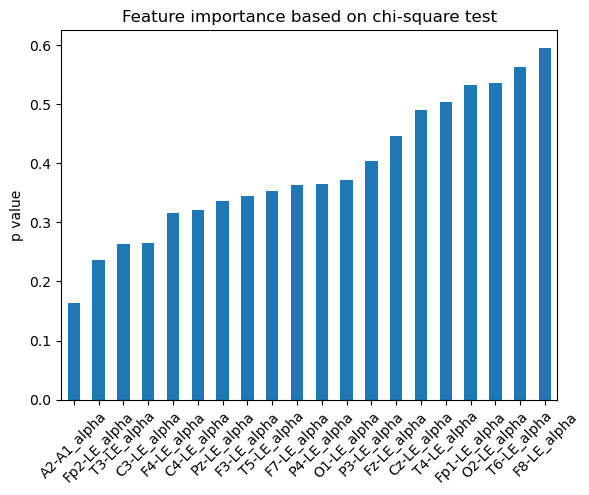

In [16]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [17]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['A2-A1_alpha', 'Fp2-LE_alpha', 'T3-LE_alpha'], dtype='object')

In [18]:
# sklearn returns numpy arrays. Convert to dataframe

X_train = X_train[selected]
X_test = X_test[selected]

X_train.head()

,A2-A1_alpha,Fp2-LE_alpha,T3-LE_alpha
977,13.11,7.87,7.19
903,3.27,18.64,8.66
131,29.38,28.85,719.14
252,18.07,15.33,6.57
330,5.80,16.12,23.01


In [19]:
res=all_result(X_train,X_test,y_train,y_test)
res

,Algo Names,Accuracy,Sensitivity,Specificity,F1-Score
0,SVM,0.702624,0.465116,0.941520,0.610687
1,LogisticRegression,0.588921,0.308140,0.871345,0.429150
2,DecissionTree,0.688047,0.651163,0.725146,0.676737
3,RandomForest,0.711370,0.604651,0.818713,0.677524
4,Voting,0.676385,0.395349,0.959064,0.550607
